Project 2:
Business Question: A company has bought a middle class house and wants to renovate it and then sell it. What could they take advantage of to make the most profit

In [81]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
from utils import evaluate_model
from sklearn.model_selection import train_test_split

# Data Understanding:

In [82]:
df = pd.read_csv('data/kc_house_data.csv')

In [83]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [84]:
len(df)

21597

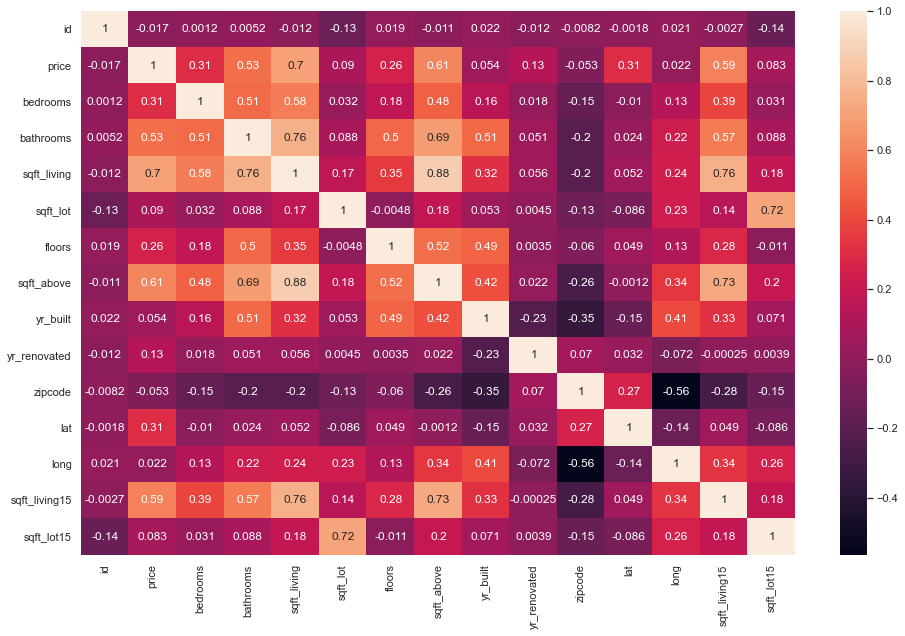

In [85]:
#Examining correlations
sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(df.corr(), annot=True);

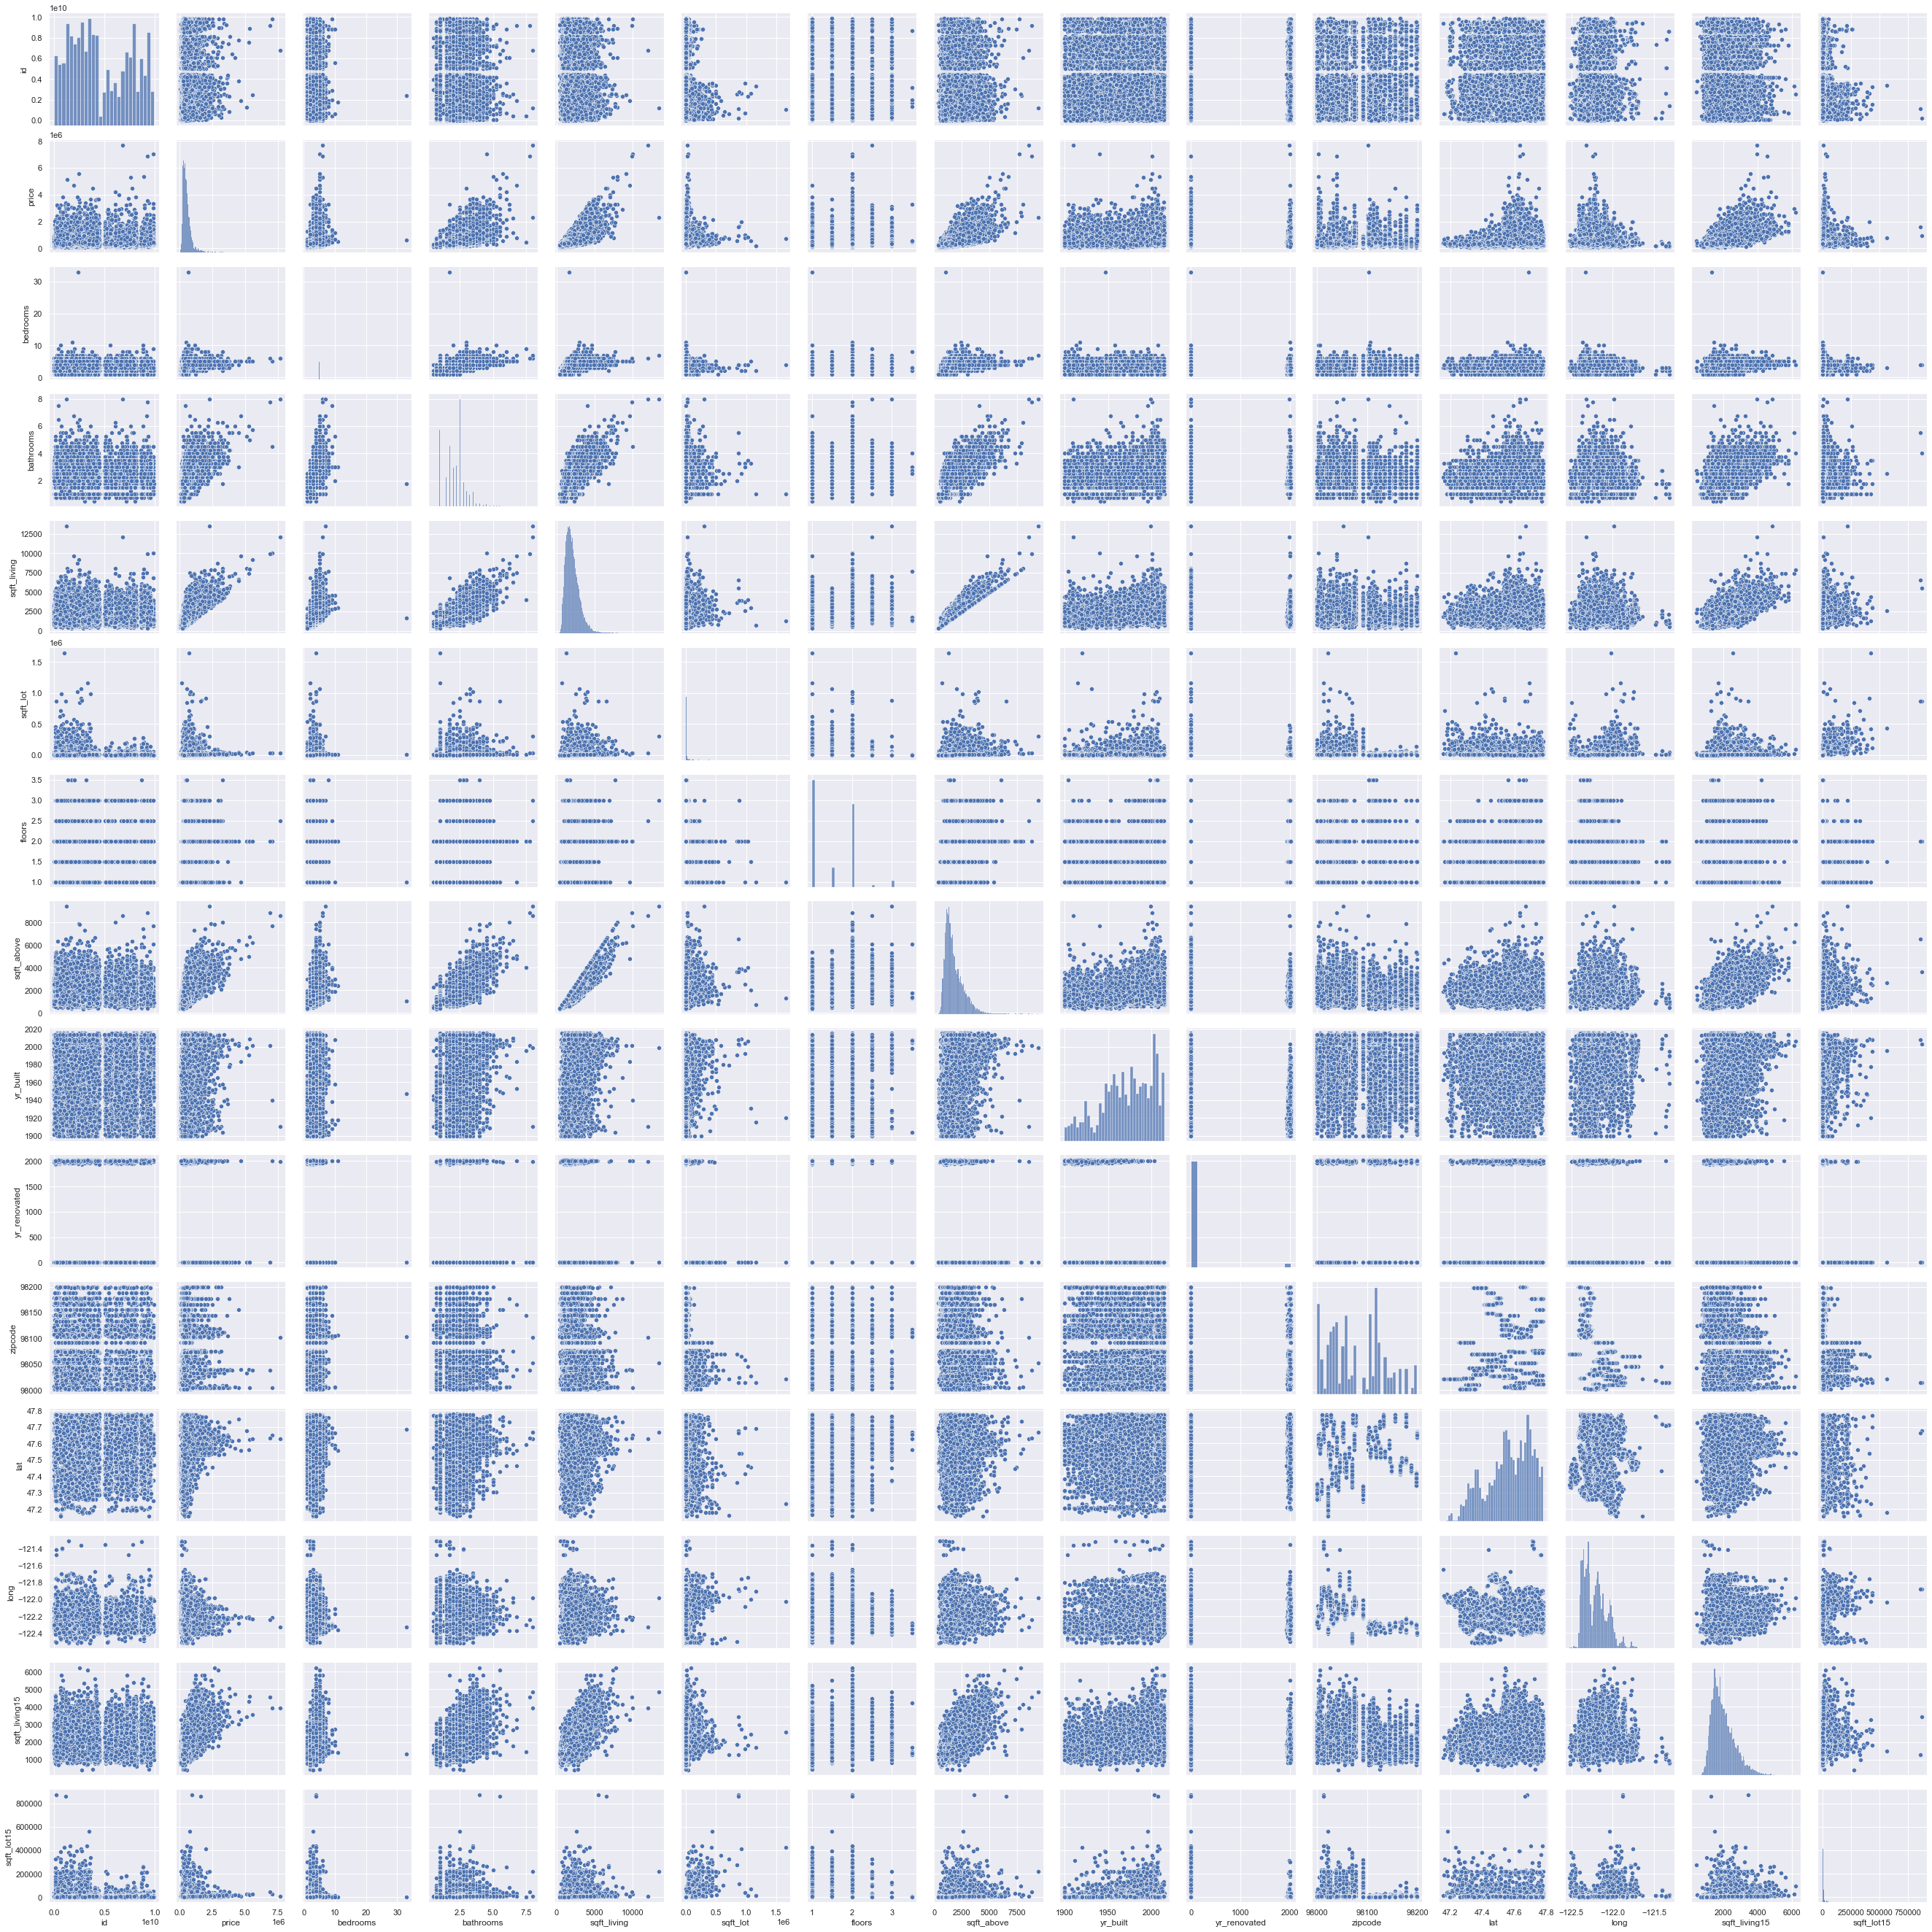

In [86]:
sns.pairplot(df);

# Data Manipulation:

Our business question is dealing with a middle class home. To examine middle-class homes, we are going to filter the data by price.

In [87]:
#Filtering data to get middle class homes
zscore(df['price'])

array([-0.86671627, -0.00625157, -0.98077344, ..., -0.37618606,
       -0.38190525, -0.58606486])

In [88]:
df['price_z'] = zscore(df['price'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_z
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-0.866716
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,-0.006252
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,-0.980773
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.173409
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.082471


In [89]:
#price_z_df == new df
price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]
price_z_df

<ipython-input-89-c8e8ebfa8a5a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_z
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-0.866716
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,-0.006252
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,-0.980773
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.173409
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,-0.490790
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,-0.381905
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,-0.376186
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,-0.381905


Our data has now been filtered to only include data with a price within one standard deviation of price. The next step is that we are going to do is drop irrelevant columns. We are assuming the company already bought a house so we are going to drop variables that they do not have control over such as view and waterfront

In [90]:
#Droping irrelevant columns
df_new = price_z_df.drop(columns = 
                         ['id', 'date', 'yr_built', 'yr_renovated','waterfront','view'])

In [91]:
#Turning sqft_basement into int instead of str
df_new['sqft_basement'] = df_new['sqft_living'] - df_new['sqft_above']

In [92]:
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,price_z
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0,98178,47.5112,-122.257,1340,5650,-0.866716
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400,98125,47.7210,-122.319,1690,7639,-0.006252
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0,98028,47.7379,-122.233,2720,8062,-0.980773
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910,98136,47.5208,-122.393,1360,5000,0.173409
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0,98074,47.6168,-122.045,1800,7503,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,Average,8 Good,1530,0,98103,47.6993,-122.346,1530,1509,-0.490790
21593,400000.0,4,2.50,2310,5813,2.0,Average,8 Good,2310,0,98146,47.5107,-122.362,1830,7200,-0.381905
21594,402101.0,2,0.75,1020,1350,2.0,Average,7 Average,1020,0,98144,47.5944,-122.299,1020,2007,-0.376186
21595,400000.0,3,2.50,1600,2388,2.0,Average,8 Good,1600,0,98027,47.5345,-122.069,1410,1287,-0.381905


Now, we are going to turn string values into integers

In [93]:
#Lets see how grade impacts price as well 
#First we need to make this column numeric instead of str's
df_new['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '9 Better', '5 Fair',
       '10 Very Good', '4 Low', '11 Excellent', '12 Luxury', '3 Poor'],
      dtype=object)

In [94]:
df_new['grade'] = df_new['grade'].str[0:2].astype(int)

In [95]:
df_new['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 19205, dtype: int64

In [96]:
#Turning condition into numeric
df_new['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [97]:
df_new['condition'] = df_new['condition'].replace({'Average': 3, 'Very Good': 5, "Poor": 1, "Fair": 2, 'Good': 4}).astype(int)

In [98]:
df_new['condition']

0        3
1        3
2        3
3        5
4        3
        ..
21592    3
21593    3
21594    3
21595    3
21596    3
Name: condition, Length: 19205, dtype: int64

----

In [18]:
X = df_new[['floors', 'sqft_living', 'condition', 'zipcode']]
y = df_new['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [20]:
cat_cols = ['zipcode']

In [21]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',)

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [22]:
X_train_enc = pd.DataFrame(X_train_enc, columns = ct.get_feature_names(), index=X_train.index)

In [23]:
X_train_enc.index = y_train.index

In [24]:
# scale our data - now let's use a Min Max Scaler because binaries!
scaler = MinMaxScaler()

# train on train data
scaler.fit(X_train_enc)

# transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     623.2
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:54:44   Log-Likelihood:            -1.8432e+05
No. Observations:               14403   AIC:                         3.688e+05
Df Residuals:                   14330   BIC:                         3.693e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.858e+04   6522.548      4.381      0.0

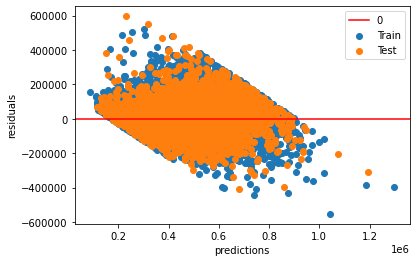

In [26]:
train_preds, test_preds, model_params = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [31]:
['const', *ct.get_feature_names()]

['const',
 'ohe__x0_98002',
 'ohe__x0_98003',
 'ohe__x0_98004',
 'ohe__x0_98005',
 'ohe__x0_98006',
 'ohe__x0_98007',
 'ohe__x0_98008',
 'ohe__x0_98010',
 'ohe__x0_98011',
 'ohe__x0_98014',
 'ohe__x0_98019',
 'ohe__x0_98022',
 'ohe__x0_98023',
 'ohe__x0_98024',
 'ohe__x0_98027',
 'ohe__x0_98028',
 'ohe__x0_98029',
 'ohe__x0_98030',
 'ohe__x0_98031',
 'ohe__x0_98032',
 'ohe__x0_98033',
 'ohe__x0_98034',
 'ohe__x0_98038',
 'ohe__x0_98039',
 'ohe__x0_98040',
 'ohe__x0_98042',
 'ohe__x0_98045',
 'ohe__x0_98052',
 'ohe__x0_98053',
 'ohe__x0_98055',
 'ohe__x0_98056',
 'ohe__x0_98058',
 'ohe__x0_98059',
 'ohe__x0_98065',
 'ohe__x0_98070',
 'ohe__x0_98072',
 'ohe__x0_98074',
 'ohe__x0_98075',
 'ohe__x0_98077',
 'ohe__x0_98092',
 'ohe__x0_98102',
 'ohe__x0_98103',
 'ohe__x0_98105',
 'ohe__x0_98106',
 'ohe__x0_98107',
 'ohe__x0_98108',
 'ohe__x0_98109',
 'ohe__x0_98112',
 'ohe__x0_98115',
 'ohe__x0_98116',
 'ohe__x0_98117',
 'ohe__x0_98118',
 'ohe__x0_98119',
 'ohe__x0_98122',
 'ohe__x0_98125',


In [32]:
model_param_eval = pd.DataFrame(model_params)
model_param_eval['names'] = ['const', *ct.get_feature_names()]

In [38]:
model_param_eval.sort_values(by=0, ascending=False).loc[~model_param_eval['names'].str.contains('ohe')]

,0,names
x71,996267.422785,sqft_living
x72,61438.617115,condition
const,28577.555946,const
x70,20618.552839,floors


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     623.2
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:35:30   Log-Likelihood:            -1.8432e+05
No. Observations:               14403   AIC:                         3.688e+05
Df Residuals:                   14330   BIC:                         3.693e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.687e+04   7664.830     -6.116

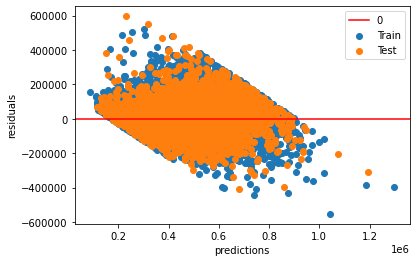

In [41]:
unstrain_preds, unstest_preds, unsmodel_params = evaluate_model(X_train_enc, X_test_enc, y_train, y_test)

In [42]:
['const', *ct.get_feature_names()]

['const',
 'ohe__x0_98002',
 'ohe__x0_98003',
 'ohe__x0_98004',
 'ohe__x0_98005',
 'ohe__x0_98006',
 'ohe__x0_98007',
 'ohe__x0_98008',
 'ohe__x0_98010',
 'ohe__x0_98011',
 'ohe__x0_98014',
 'ohe__x0_98019',
 'ohe__x0_98022',
 'ohe__x0_98023',
 'ohe__x0_98024',
 'ohe__x0_98027',
 'ohe__x0_98028',
 'ohe__x0_98029',
 'ohe__x0_98030',
 'ohe__x0_98031',
 'ohe__x0_98032',
 'ohe__x0_98033',
 'ohe__x0_98034',
 'ohe__x0_98038',
 'ohe__x0_98039',
 'ohe__x0_98040',
 'ohe__x0_98042',
 'ohe__x0_98045',
 'ohe__x0_98052',
 'ohe__x0_98053',
 'ohe__x0_98055',
 'ohe__x0_98056',
 'ohe__x0_98058',
 'ohe__x0_98059',
 'ohe__x0_98065',
 'ohe__x0_98070',
 'ohe__x0_98072',
 'ohe__x0_98074',
 'ohe__x0_98075',
 'ohe__x0_98077',
 'ohe__x0_98092',
 'ohe__x0_98102',
 'ohe__x0_98103',
 'ohe__x0_98105',
 'ohe__x0_98106',
 'ohe__x0_98107',
 'ohe__x0_98108',
 'ohe__x0_98109',
 'ohe__x0_98112',
 'ohe__x0_98115',
 'ohe__x0_98116',
 'ohe__x0_98117',
 'ohe__x0_98118',
 'ohe__x0_98119',
 'ohe__x0_98122',
 'ohe__x0_98125',


In [43]:
unsmodel_param_eval = pd.DataFrame(unsmodel_params)
unsmodel_param_eval['names'] = ['const', *ct.get_feature_names()]

In [47]:
unsmodel_param_eval.sort_values(by=0, ascending=False).loc[~unsmodel_param_eval['names'].str.contains('ohe')]

,0,names
condition,15359.654279,condition
floors,8247.421136,floors
sqft_living,140.122000,sqft_living
const,-46874.659613,const


-------

------

In [53]:
df_new['bbration'] = df_new['bathrooms'] / df_new['bedrooms']

In [54]:
X = df_new[['lat', 'long', 'condition', 'zipcode','floors', 'sqft_living', 'bbration']]
y = df_new['price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [56]:
cat_cols = ['zipcode']

In [57]:
# create an encoder object. This will help us to convert
# categorical variables to new columns
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',)

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)
ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [58]:
X_train_enc = pd.DataFrame(X_train_enc, columns = ct.get_feature_names(), index=X_train.index)

In [59]:
X_train_enc.index = y_train.index

In [60]:
# scale our data - now let's use a Min Max Scaler because binaries!
scaler = MinMaxScaler()

# train on train data
scaler.fit(X_train_enc)

# transform both train and test data
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     602.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:13:39   Log-Likelihood:            -1.8428e+05
No. Observations:               14403   AIC:                         3.687e+05
Df Residuals:                   14327   BIC:                         3.693e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.215e+04   1.34e+04     -2.400      0.0

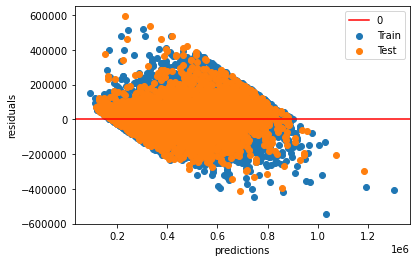

In [61]:
train_preds, test_preds, model_params = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [62]:
['const', *ct.get_feature_names()]

['const',
 'ohe__x0_98002',
 'ohe__x0_98003',
 'ohe__x0_98004',
 'ohe__x0_98005',
 'ohe__x0_98006',
 'ohe__x0_98007',
 'ohe__x0_98008',
 'ohe__x0_98010',
 'ohe__x0_98011',
 'ohe__x0_98014',
 'ohe__x0_98019',
 'ohe__x0_98022',
 'ohe__x0_98023',
 'ohe__x0_98024',
 'ohe__x0_98027',
 'ohe__x0_98028',
 'ohe__x0_98029',
 'ohe__x0_98030',
 'ohe__x0_98031',
 'ohe__x0_98032',
 'ohe__x0_98033',
 'ohe__x0_98034',
 'ohe__x0_98038',
 'ohe__x0_98039',
 'ohe__x0_98040',
 'ohe__x0_98042',
 'ohe__x0_98045',
 'ohe__x0_98052',
 'ohe__x0_98053',
 'ohe__x0_98055',
 'ohe__x0_98056',
 'ohe__x0_98058',
 'ohe__x0_98059',
 'ohe__x0_98065',
 'ohe__x0_98070',
 'ohe__x0_98072',
 'ohe__x0_98074',
 'ohe__x0_98075',
 'ohe__x0_98077',
 'ohe__x0_98092',
 'ohe__x0_98102',
 'ohe__x0_98103',
 'ohe__x0_98105',
 'ohe__x0_98106',
 'ohe__x0_98107',
 'ohe__x0_98108',
 'ohe__x0_98109',
 'ohe__x0_98112',
 'ohe__x0_98115',
 'ohe__x0_98116',
 'ohe__x0_98117',
 'ohe__x0_98118',
 'ohe__x0_98119',
 'ohe__x0_98122',
 'ohe__x0_98125',


In [63]:
model_param_eval = pd.DataFrame(model_params)
model_param_eval['names'] = ['const', *ct.get_feature_names()]

In [64]:
model_param_eval.sort_values(by=0, ascending=False).loc[~model_param_eval['names'].str.contains('ohe')]

,0,names
x74,990702.741889,sqft_living
x70,150646.047193,lat
x72,64152.533568,condition
x75,64029.324850,bbration
x71,43732.555891,long
x73,12993.769794,floors
const,-32152.422258,const


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     602.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:16:56   Log-Likelihood:            -1.8428e+05
No. Observations:               14403   AIC:                         3.687e+05
Df Residuals:                   14327   BIC:                         3.693e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.732e+06   4.57e+06     -1.472

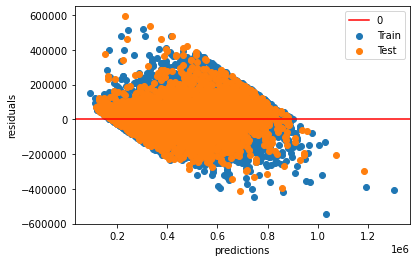

In [66]:
unstrain_preds, unstest_preds, unsmodel_params = evaluate_model(X_train_enc, X_test_enc, y_train, y_test)

In [67]:
['const', *ct.get_feature_names()]

['const',
 'ohe__x0_98002',
 'ohe__x0_98003',
 'ohe__x0_98004',
 'ohe__x0_98005',
 'ohe__x0_98006',
 'ohe__x0_98007',
 'ohe__x0_98008',
 'ohe__x0_98010',
 'ohe__x0_98011',
 'ohe__x0_98014',
 'ohe__x0_98019',
 'ohe__x0_98022',
 'ohe__x0_98023',
 'ohe__x0_98024',
 'ohe__x0_98027',
 'ohe__x0_98028',
 'ohe__x0_98029',
 'ohe__x0_98030',
 'ohe__x0_98031',
 'ohe__x0_98032',
 'ohe__x0_98033',
 'ohe__x0_98034',
 'ohe__x0_98038',
 'ohe__x0_98039',
 'ohe__x0_98040',
 'ohe__x0_98042',
 'ohe__x0_98045',
 'ohe__x0_98052',
 'ohe__x0_98053',
 'ohe__x0_98055',
 'ohe__x0_98056',
 'ohe__x0_98058',
 'ohe__x0_98059',
 'ohe__x0_98065',
 'ohe__x0_98070',
 'ohe__x0_98072',
 'ohe__x0_98074',
 'ohe__x0_98075',
 'ohe__x0_98077',
 'ohe__x0_98092',
 'ohe__x0_98102',
 'ohe__x0_98103',
 'ohe__x0_98105',
 'ohe__x0_98106',
 'ohe__x0_98107',
 'ohe__x0_98108',
 'ohe__x0_98109',
 'ohe__x0_98112',
 'ohe__x0_98115',
 'ohe__x0_98116',
 'ohe__x0_98117',
 'ohe__x0_98118',
 'ohe__x0_98119',
 'ohe__x0_98122',
 'ohe__x0_98125',


In [68]:
unsmodel_param_eval = pd.DataFrame(unsmodel_params)
unsmodel_param_eval['names'] = ['const', *ct.get_feature_names()]

In [71]:
unsmodel_params

const           -6.731686e+06
ohe__x0_98002   -1.581093e+04
ohe__x0_98003    9.023404e+03
ohe__x0_98004    4.153847e+05
ohe__x0_98005    2.677554e+05
                     ...     
long             3.918688e+04
condition        1.603813e+04
floors           5.197508e+03
sqft_living      1.393393e+02
bbration         2.616678e+04
Length: 76, dtype: float64

In [69]:
unsmodel_param_eval.sort_values(by=0, ascending=False).loc[~unsmodel_param_eval['names'].str.contains('ohe')]

,0,names
lat,2.423131e+05,lat
long,3.918688e+04,long
bbration,2.616678e+04,bbration
condition,1.603813e+04,condition
floors,5.197508e+03,floors
sqft_living,1.393393e+02,sqft_living
const,-6.731686e+06,const


---

---

In [ ]:
df_new['bathrooms'] = round(df_new['bathrooms'])

In [ ]:
X = df_new['bathrooms']
y = df_new['price']

In [ ]:
model_no_intercept = sm.OLS(y, sm.add_constant(X)).fit()
model_no_intercept.params

In [ ]:
plt.figure(figsize=(18,10))

# this plots the actual data
plt.bar(X, y, width=0.4)

plt.ylabel('price')
plt.xlabel('bathrooms')
plt.show()

---